# Polynomial regression with TensorFlow 

Code Created by Luis Enrique Acevedo Galicia

Date: 2019-02-03

Here, I present a simple and easy way to create a polynomial linear regression with TensorFlow. In this case the data based on file Polynomial_test.csv. Dataset was created to emulate Y=a*x³+b*x²+c*x+d

# The Libraries

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import preprocessing

# The data 

In [75]:
data = pd.read_csv('Polynimial_test.csv')
data.head()

,Serial No.,Input,Target
0,1,9.65,4272.571313
1,2,8.87,3334.876333
2,3,8.00,2463.600000
3,4,8.67,3118.874103
4,5,8.21,2657.946905


Verifying that data is completed

In [77]:
data[pd.isnull(data['Input'])]

,Serial No.,Input,Target


learning about this data set

In [78]:
Input_mean=data ['Input'].mean()
Input_std=data ['Input'].std()
Target_mean=data ['Target'].mean()
Target_std=data ['Target'].std()
data.describe()

,Serial No.,Input,Target
count,400.000000,400.000000,400.000000
mean,200.500000,8.598925,3086.352306
std,115.614301,0.596317,621.403472
min,1.000000,6.800000,1532.136000
25%,100.750000,8.170000,2620.166778
50%,200.500000,8.610000,3055.956898
75%,300.250000,9.062500,3551.999530
max,400.000000,9.920000,4634.092416


In [91]:
# The dependent variable (y) is the price
Targets = data ['Target'].as_matrix(columns=None)
Targets=np.reshape(Targets, (400,1))
Targets= preprocessing.scale(Targets) #(CGPA-mean)/std)

# The independent variable (x) is the Area
Inputs = data ['Input'].as_matrix(columns=None)
Inputs = np.reshape(Inputs, (400,1))
Inputs= preprocessing.scale(Inputs) #(CGPA-mean)/std)
#export the data
np.savez('TF_data', inputs=Inputs, targets=Targets)


/home/bwayne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/bwayne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


# Machine learning model

In [92]:
#size of the variables
size_input = 1
size_output = 1

#define inputs and targets
TF_inputs = tf.placeholder(tf.float32, [None, size_input])
TF_targets = tf.placeholder(tf.float32, [None, size_output])

#initialize variables
a = tf.Variable(tf.random_normal([]))
b = tf.Variable(tf.random_normal([]))
c = tf.Variable(tf.random_normal([]))
d = tf.Variable(tf.random_normal([]))


#create the model and the loss
ML_model = a * tf.pow(TF_inputs, 3) + b * tf.pow(TF_inputs, 2) + c * TF_inputs + d
ML_ls =tf.losses.mean_squared_error(labels=TF_targets, predictions=ML_model)

#optimizer
Learning_rate = 0.04
N_epochs = 1000
optimizer = tf.train.GradientDescentOptimizer(Learning_rate).minimize(ML_ls)

#Prepare execution

TF_sess = tf.InteractiveSession()
TF_ini = tf.global_variables_initializer()
TF_sess.run(TF_ini)

#load the data
Train_data = np.load('TF_data.npz')


#training

for n  in range(N_epochs):
    _, curr_loss = TF_sess.run([optimizer, ML_ls], 
        feed_dict={TF_inputs: Train_data['inputs'], TF_targets: Train_data['targets']})


#print(curr_loss)
print('a = ', TF_sess.run(a))
print('b = ', TF_sess.run(b))
print('c = ', TF_sess.run(c))
print('d = ', TF_sess.run(d))
TF_a=TF_sess.run(a)
TF_b=TF_sess.run(b)
TF_c=TF_sess.run(c)
TF_d=TF_sess.run(d)



/home/bwayne/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


a =  0.0015320544
b =  0.067660734
c =  0.9971167
d =  -0.06756005


# Plot results

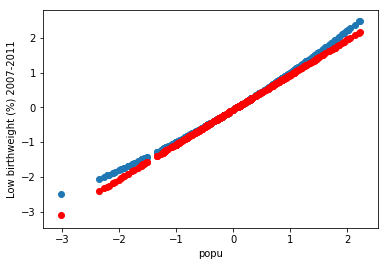

In [95]:
# The same plot
plt.scatter(Inputs,Targets)
y_hat = TF_a*pow(Inputs, 3) + TF_a*pow(Inputs, 2)+TF_c*Inputs+TF_d
# Plot the regression line 
fig = plt.scatter(Inputs,y_hat,c='red')
#plt.plot(Inputs,y_hat, lw=3, c='red', label ='regression line')

plt.ylabel('Low birthweight (%) 2007-2011')
plt.xlabel('popu')
plt.show()

# Test the model

In [98]:
Input_test = input("What's your Input? ")
Scaled_Input=(np.float32(Input_test)-Input_mean)/Input_std
Scaled_Output=TF_a*pow(Scaled_Input, 3) + TF_a*pow(Scaled_Input, 2)+TF_c*Scaled_Input+TF_d
Output_test=Scaled_Output*Target_std+Target_mean
print('Your target is ', Output_test)

What's your Input? 9.65
Your target is  4144.675397188825
